# MARKET SEGMENTATION OF CREDIT CARD CUSTOMERS

Author: Kevin Lee<br />Email: kvnlee97@gmail.com

### EXPLORING THE DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
cc_df = pd.read_csv('/Users/davidlee/Documents/Work/queens/data/CC GENERAL.csv')

In [3]:
cc_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
cc_df.info()
cc_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### CHECKING FOR MISSING DATA

In [5]:
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
cc_df.loc[(cc_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = cc_df['MINIMUM_PAYMENTS'].mean()
cc_df.loc[(cc_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = cc_df['CREDIT_LIMIT'].mean()

In [7]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
cc_df.drop('CUST_ID', axis= 1, inplace= True)

In [9]:
cc_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


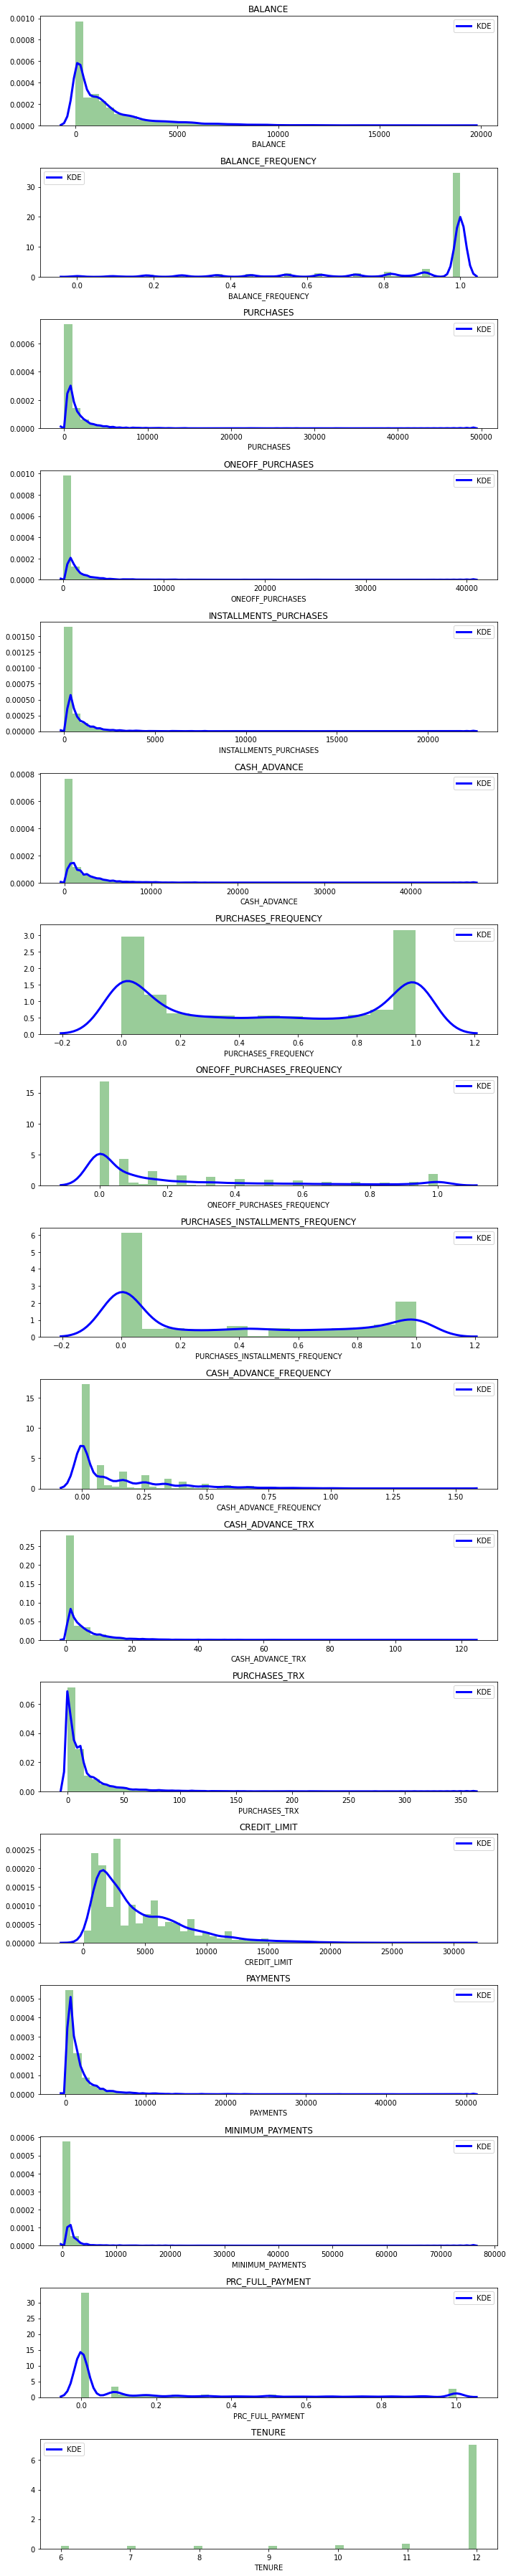

In [10]:
plt.figure(figsize= (10, 50))

for i in range(len(cc_df.columns)):
  plt.subplot(17, 1 , i+1)
  sns.distplot(cc_df[cc_df.columns[i]], kde_kws= {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws= {'color':'g'})
  plt.title(cc_df.columns[i])

plt.tight_layout()

In [11]:
cc_corr = cc_df.corr()

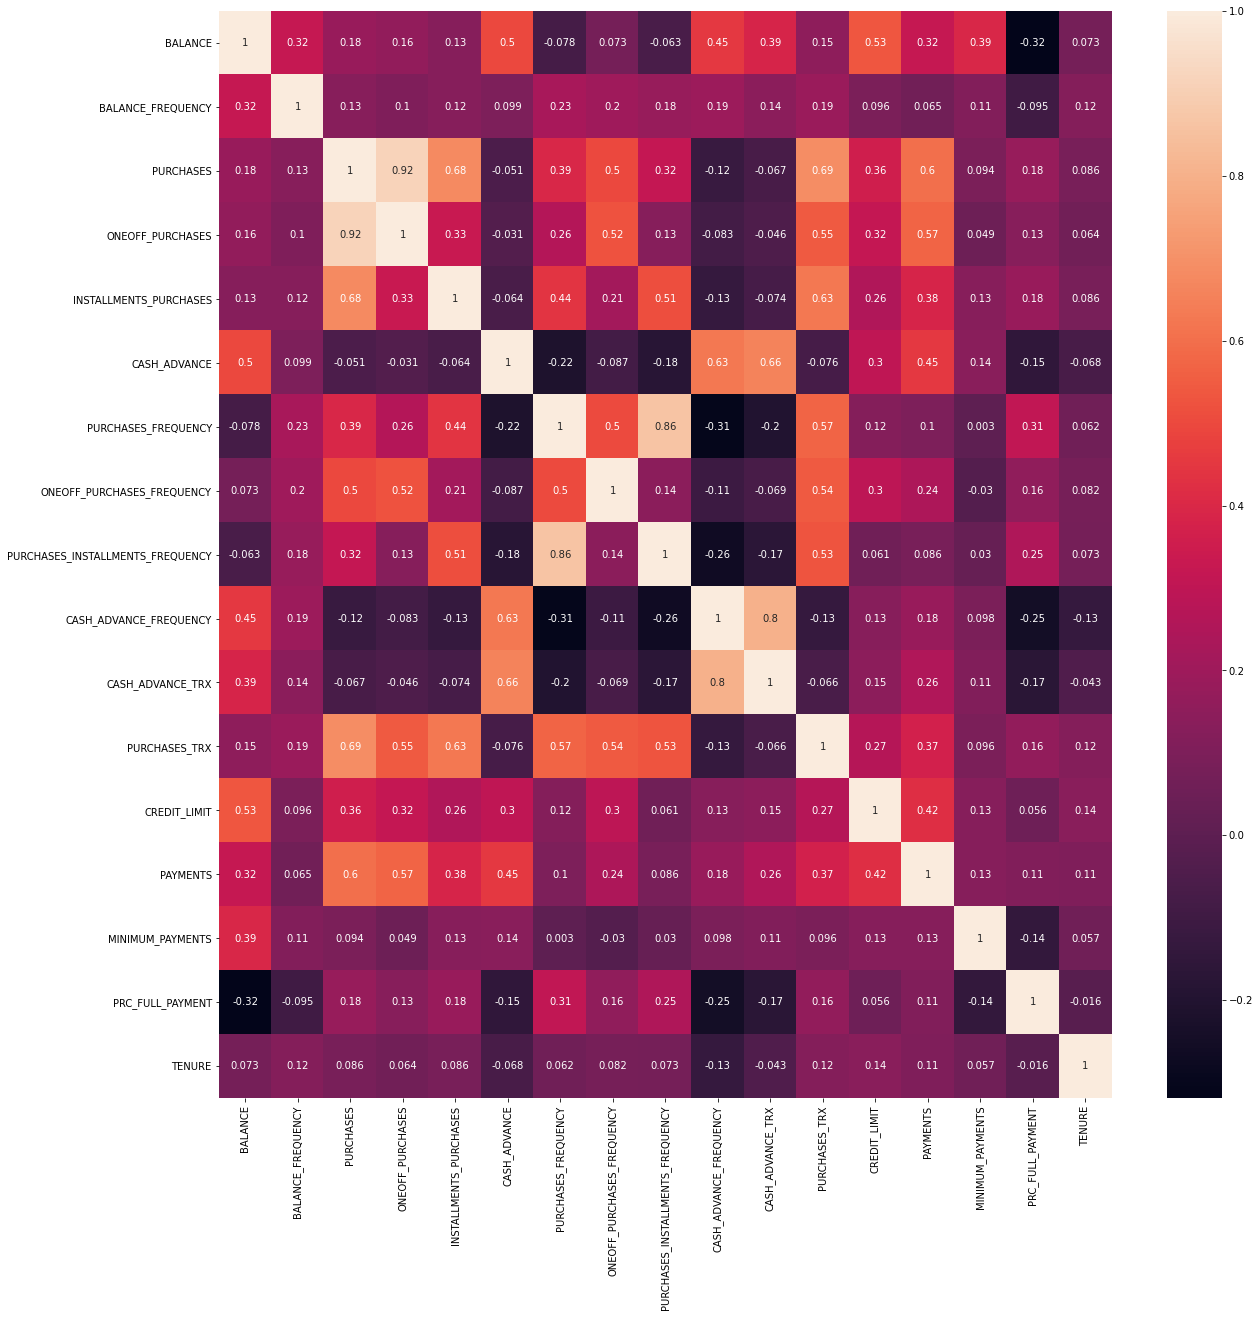

In [12]:
f, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(cc_corr, annot= True)

### FINDING THE OPTIMAL NUMBER OF CLUSTERS

In [13]:
scaler = StandardScaler()

cc_df_scaled = scaler.fit_transform(cc_df)

In [14]:
score = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(cc_df_scaled)
  score.append(kmeans.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

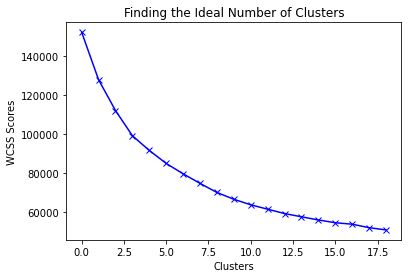

In [15]:
plt.plot(score, 'bx-')
plt.title('Finding the Ideal Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS Scores')
plt.show

### APPLYING K-MEANS CLUSTERING

In [16]:
kmeans = KMeans(8)
kmeans.fit(cc_df_scaled)
labels = kmeans.labels_
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [cc_df.columns])

In [17]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.562891,-0.391355,-0.209255,0.013610,-3.198580
1,0.005939,0.403622,-0.354287,-0.238870,-0.398750,-0.102342,-0.841320,-0.382860,-0.751318,0.090645,-0.037151,-0.477650,-0.307179,-0.252473,-0.013167,-0.455021,0.273659
2,-0.121858,0.403109,0.564973,0.684705,0.077745,-0.332601,0.998872,1.914235,0.215262,-0.418727,-0.333855,0.659581,0.465822,0.163076,-0.156076,0.460105,0.274536
3,1.670517,0.395293,-0.221426,-0.157596,-0.234095,1.989959,-0.482128,-0.213163,-0.421611,1.911163,1.911672,-0.270899,1.009831,0.794829,0.545248,-0.395980,0.073084
4,-0.700802,-2.141183,-0.309850,-0.234317,-0.302039,-0.320128,-0.554233,-0.440811,-0.439716,-0.521014,-0.376316,-0.418604,-0.173308,-0.191875,-0.256477,0.285369,0.200376
5,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
6,-0.358201,0.332047,-0.029709,-0.240570,0.371526,-0.361567,0.996298,-0.380695,1.207351,-0.471485,-0.359088,0.194868,-0.259684,-0.212705,-0.030005,0.313977,0.255518
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


In [18]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns= [cc_df.columns])

In [19]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,868.793568,0.795457,390.010464,239.326032,151.164432,1121.829931,0.409150,0.117853,0.274475,0.196855,3.251200,5.078400,2446.423119,600.208404,376.545946,0.157695,7.236800
1,1576.836906,0.972885,246.265429,195.961892,50.482517,764.254132,0.152688,0.088243,0.065844,0.153283,2.995298,2.837251,3376.805304,1002.259801,833.520918,0.020629,11.883544
2,1310.838700,0.972764,2210.278758,1728.907721,481.371037,281.391112,0.891246,0.773511,0.449988,0.051353,0.970509,31.104558,6189.300512,2205.232650,500.477164,0.288287,11.884718
3,5041.514989,0.970912,530.123995,330.859887,199.378860,5151.907174,0.296849,0.138867,0.196878,0.517587,16.294582,7.976298,8168.628155,4034.095217,2134.882948,0.037897,11.615124
4,105.815587,0.370044,341.205363,203.518742,137.937297,307.546906,0.267910,0.070955,0.189683,0.030884,0.680743,4.304899,3863.884666,1177.685781,266.498413,0.237180,11.785473
5,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
6,818.910696,0.955929,939.731774,193.140808,747.033622,220.649252,0.890213,0.088889,0.844270,0.040795,0.798315,19.553518,3549.613579,1117.384628,794.281958,0.245548,11.859267
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


In [20]:
cc_df_cluster = pd.concat([cc_df, pd.DataFrame({'cluster':labels})], axis = 1)

cc_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


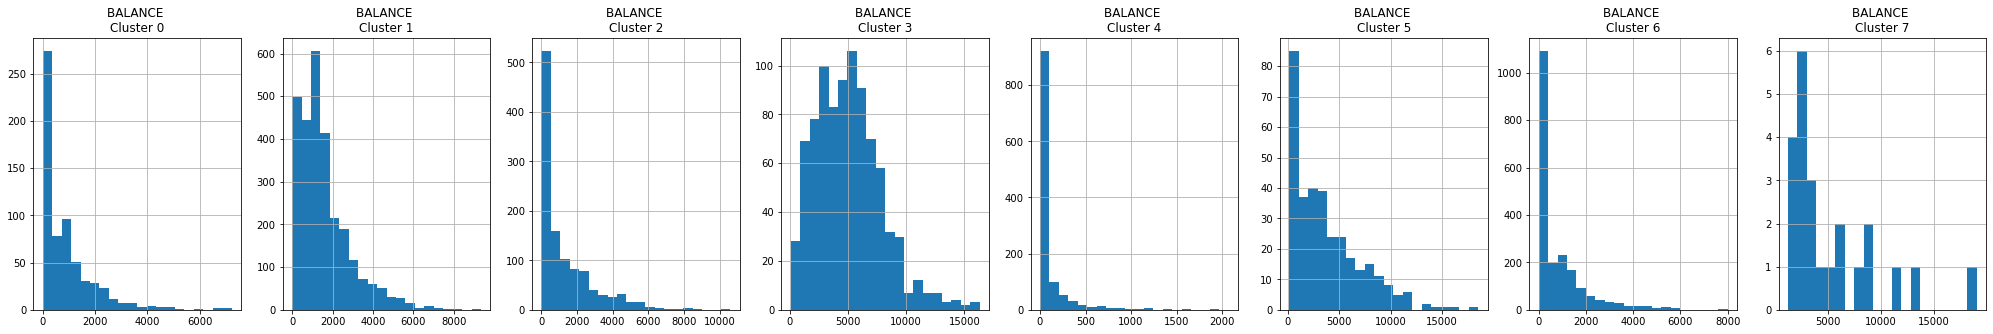

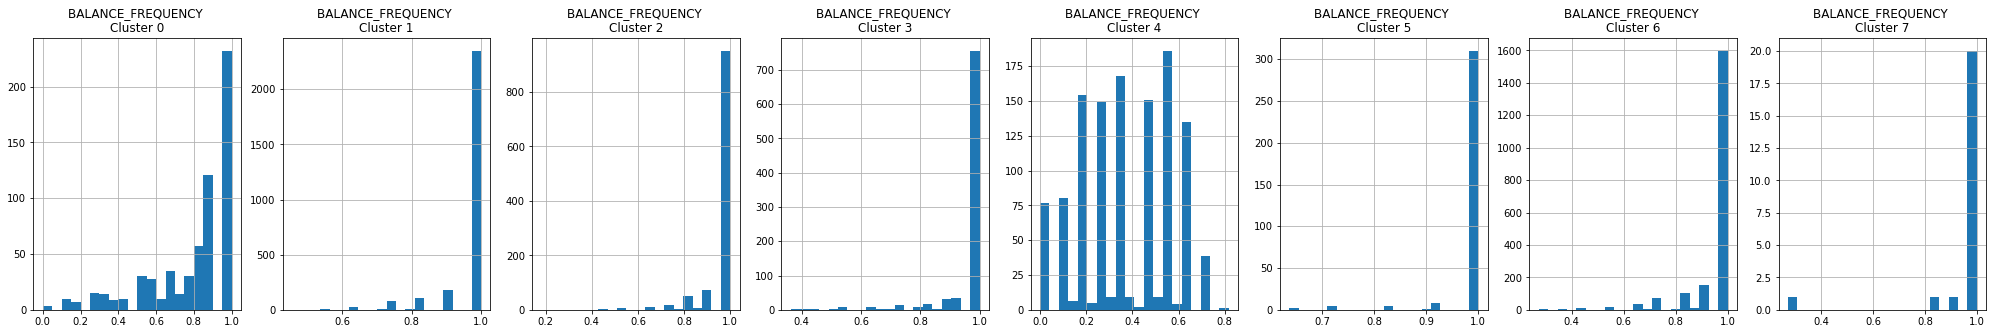

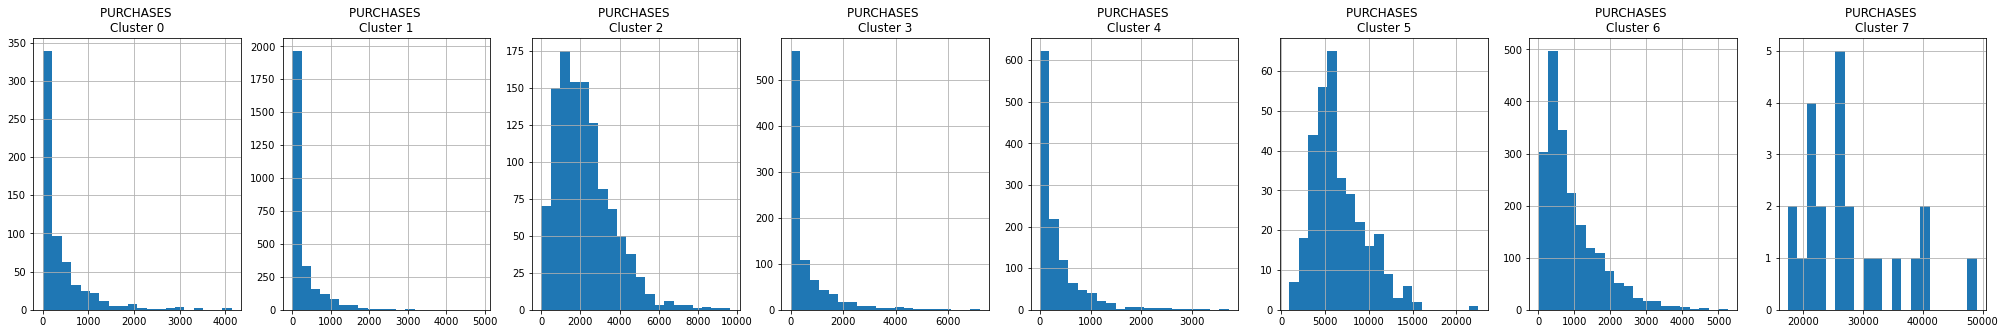

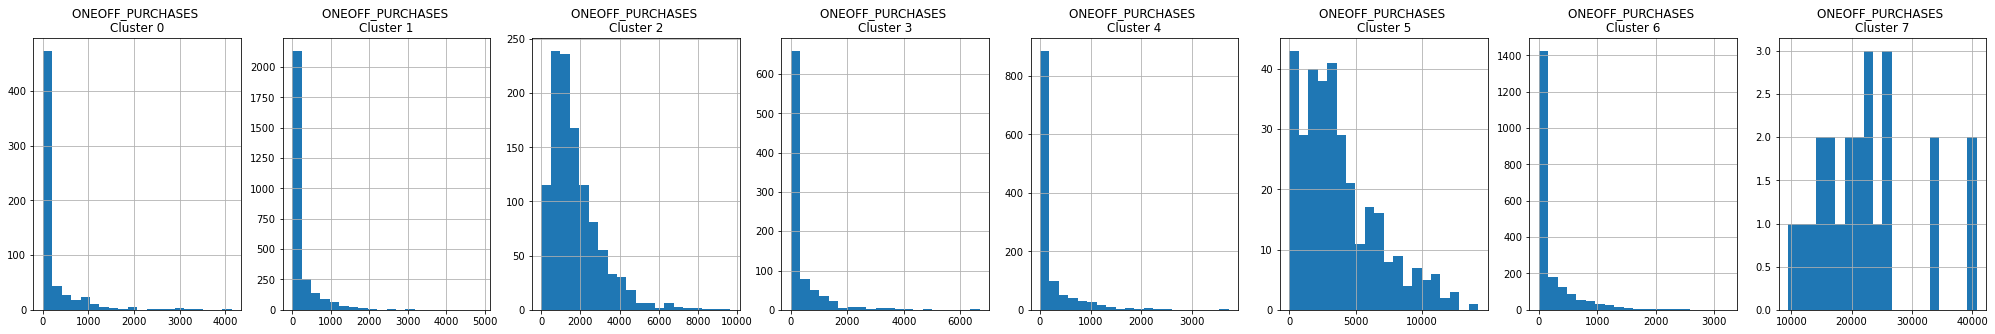

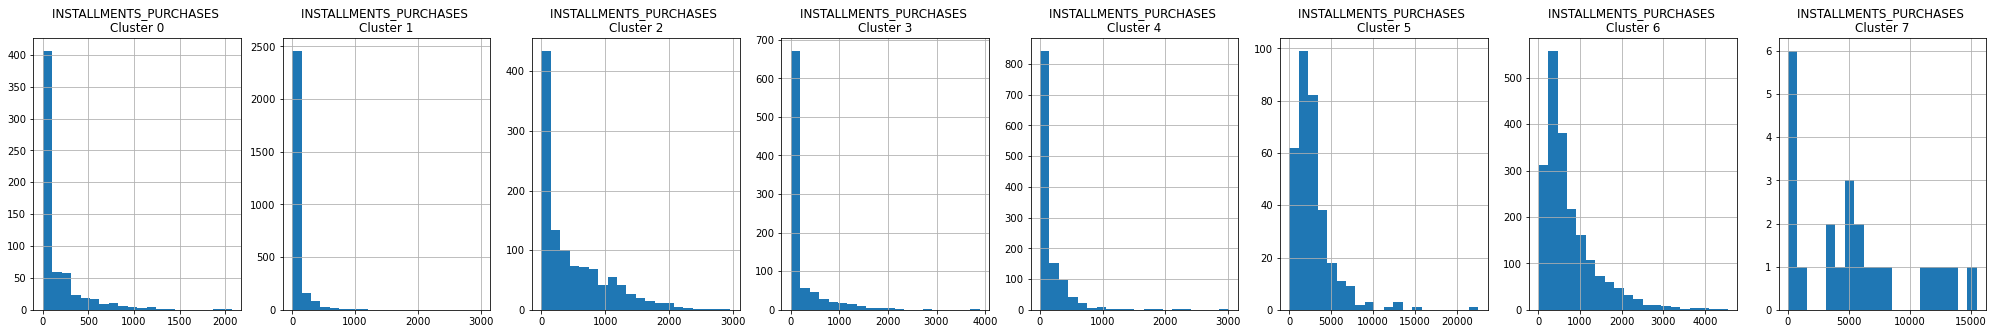

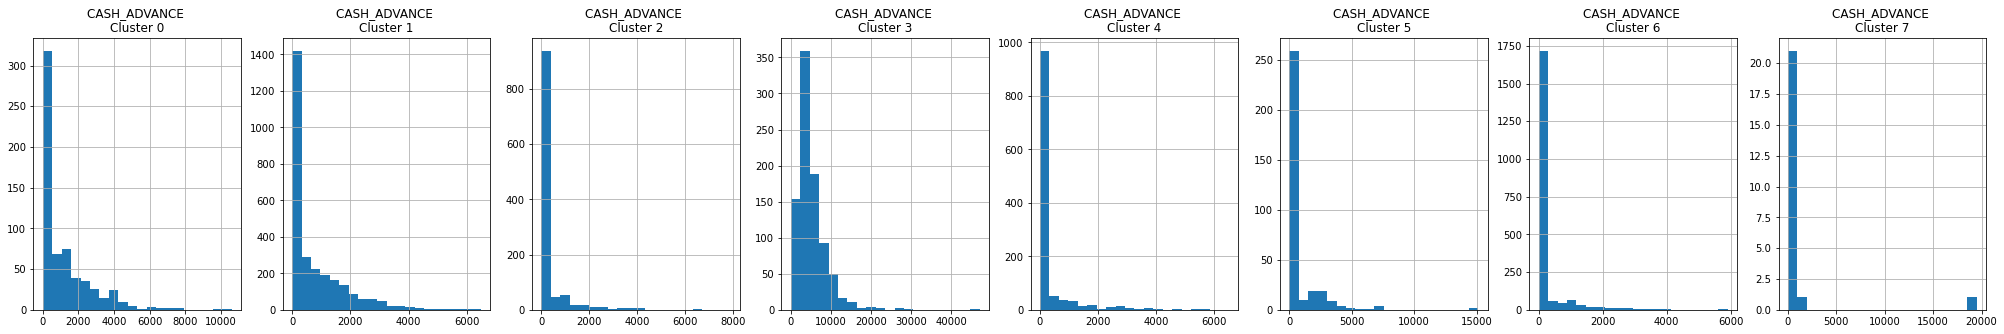

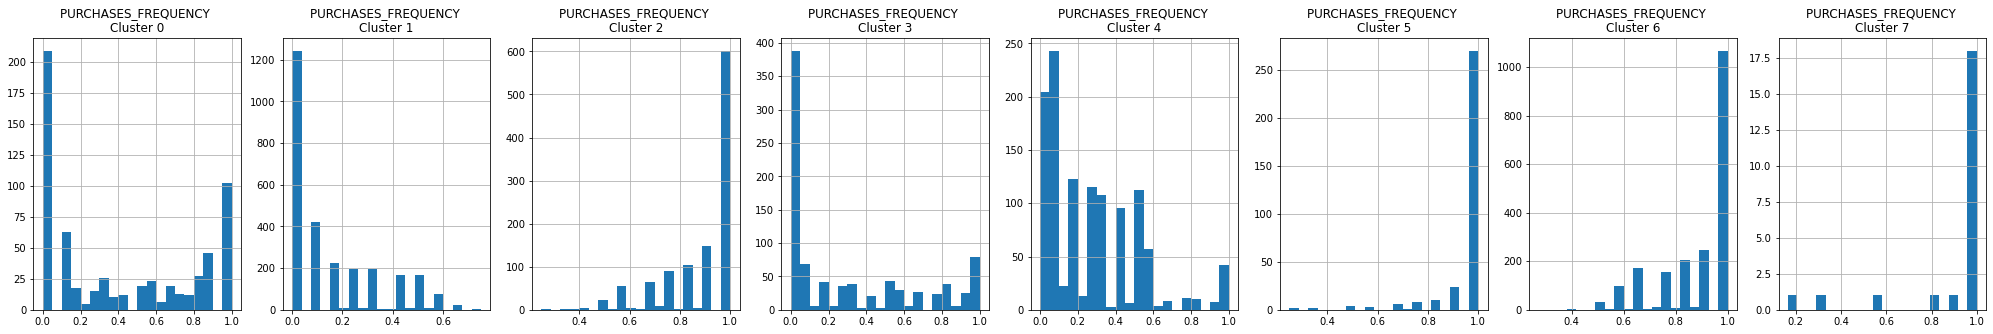

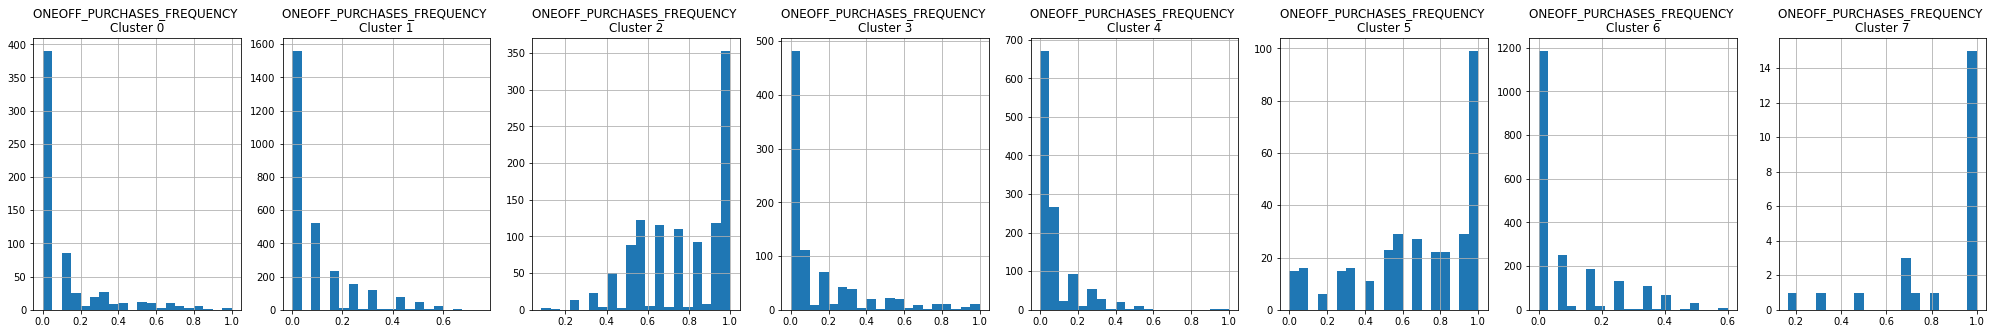

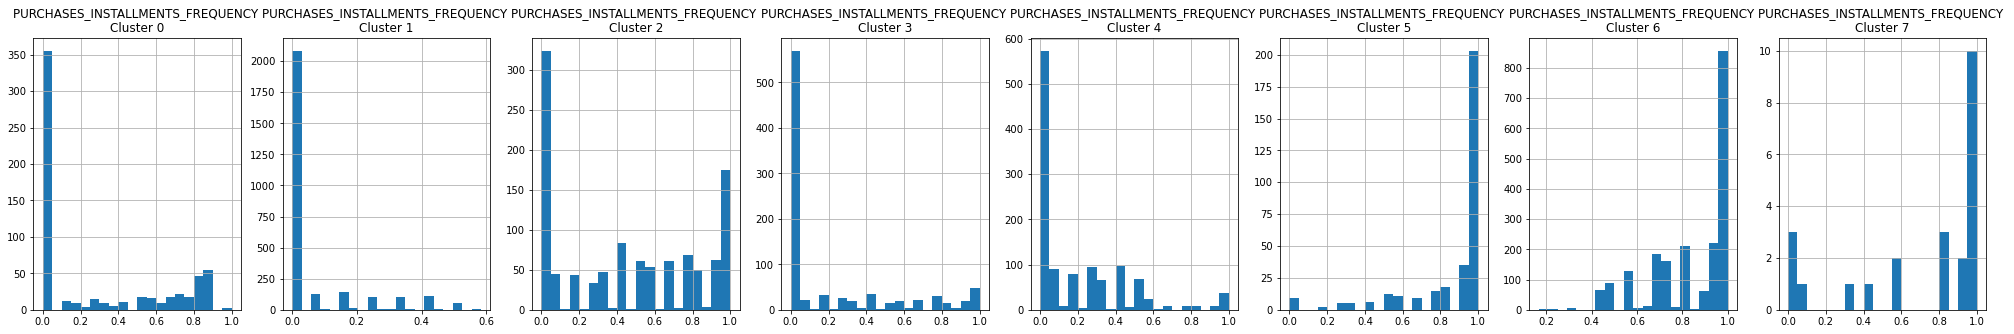

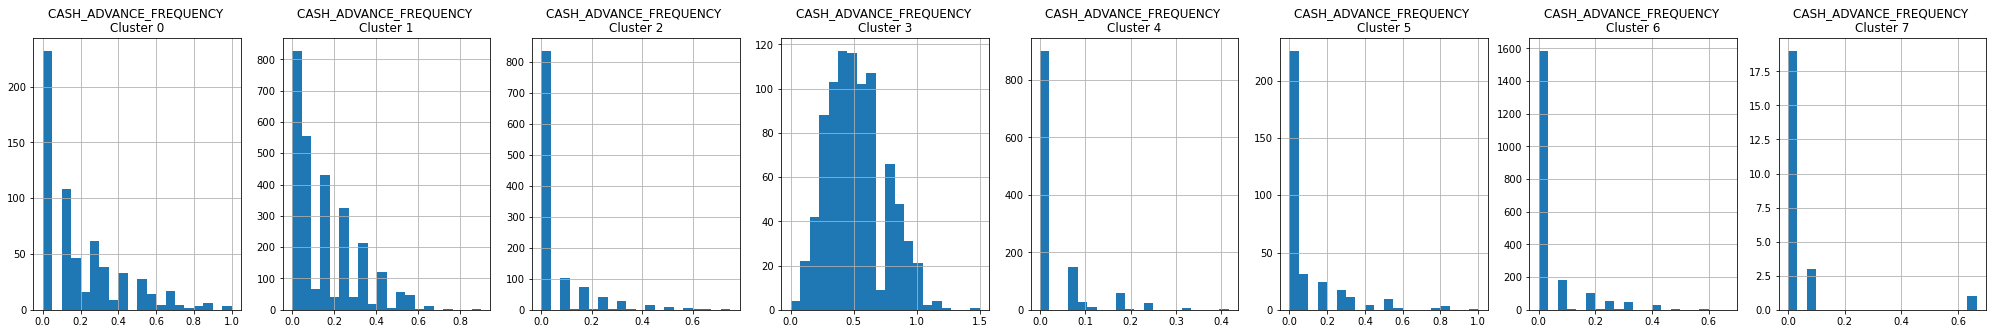

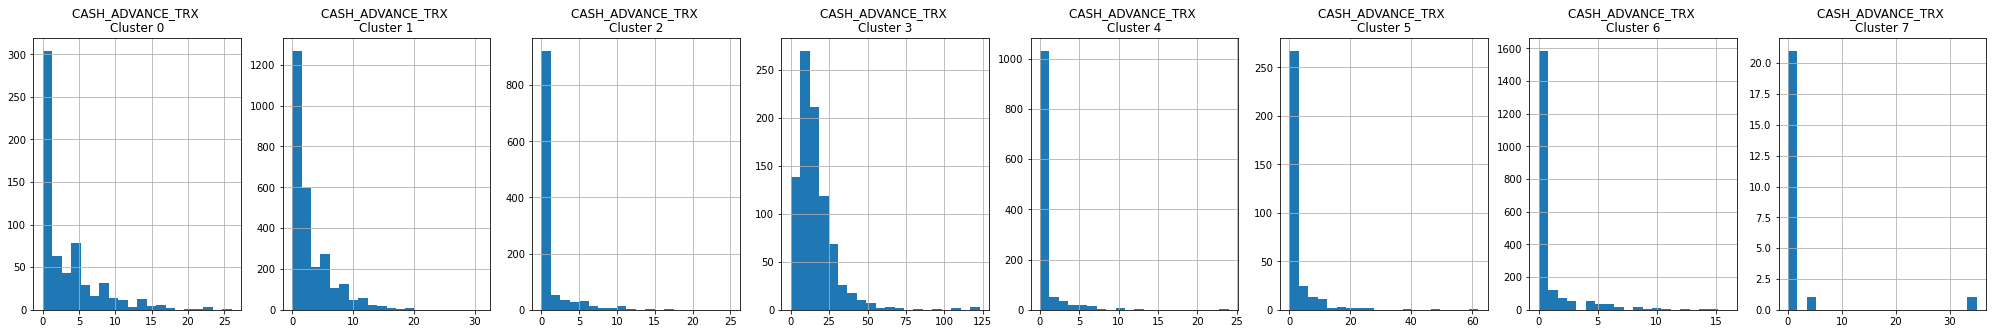

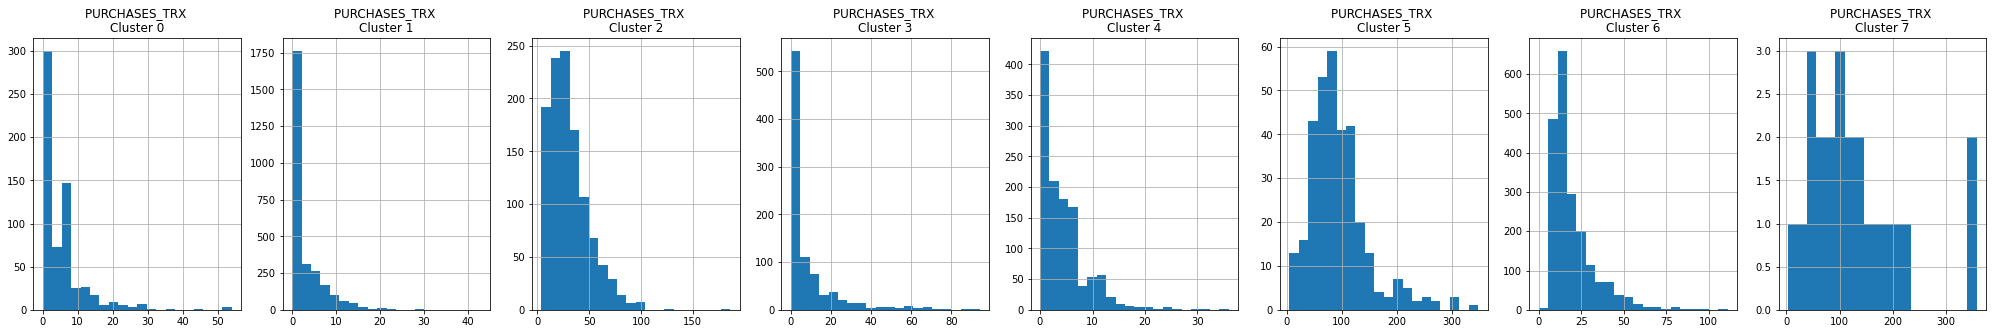

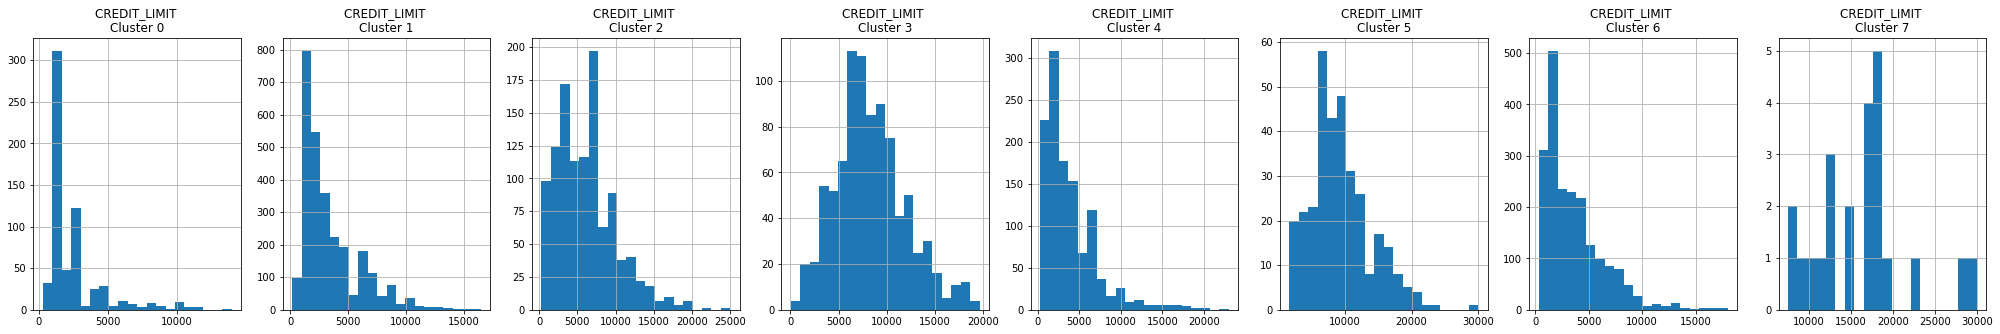

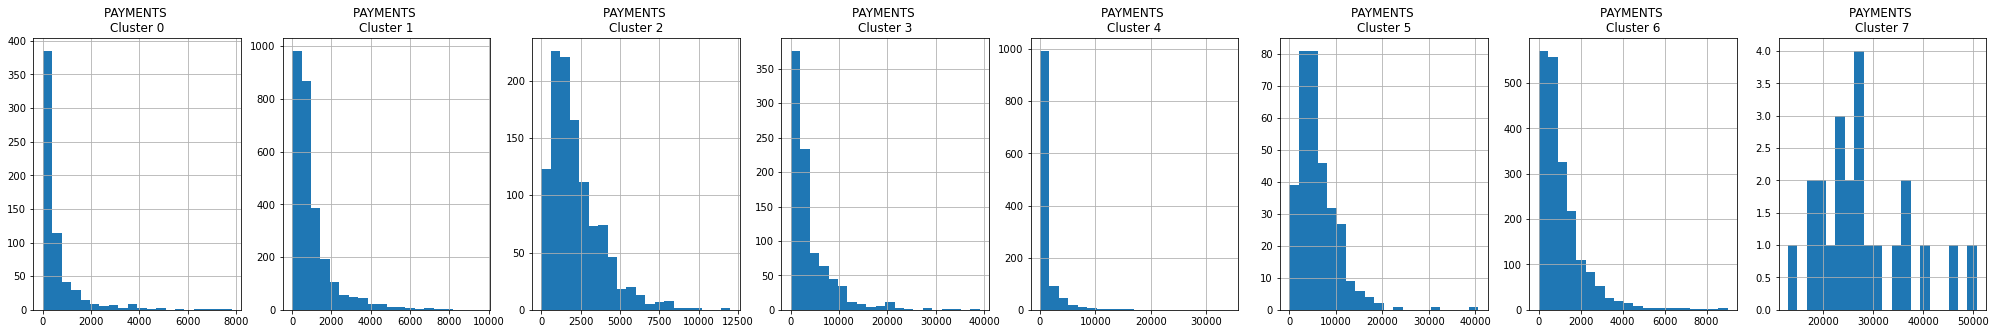

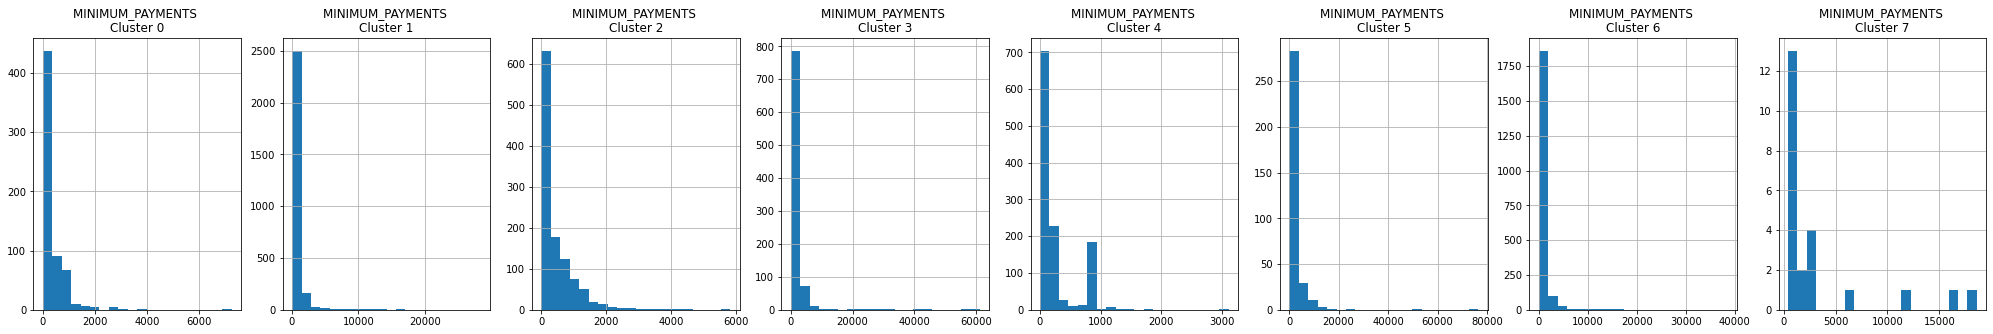

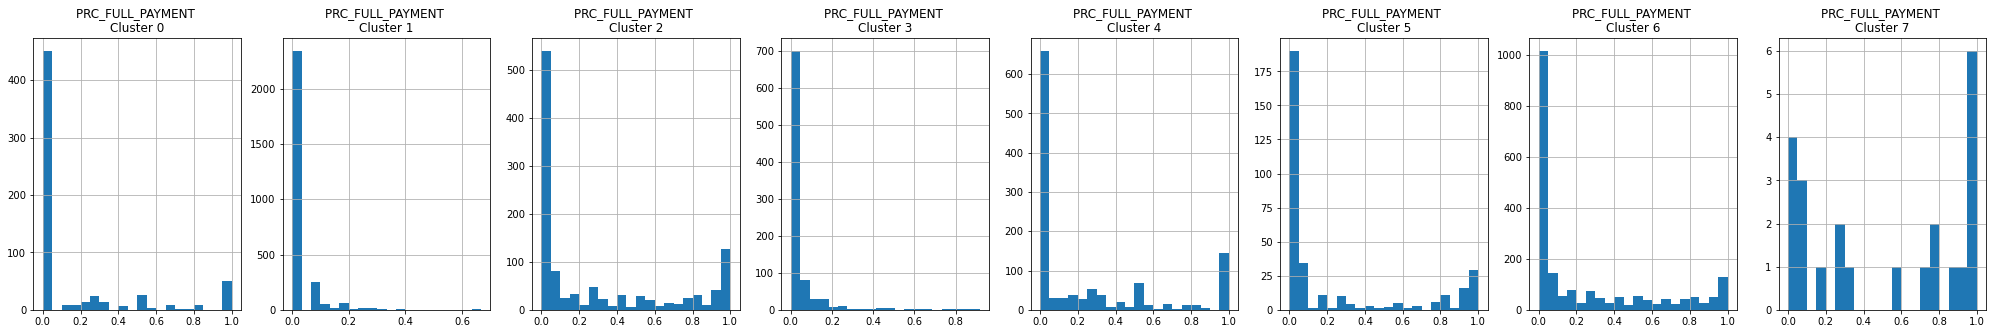

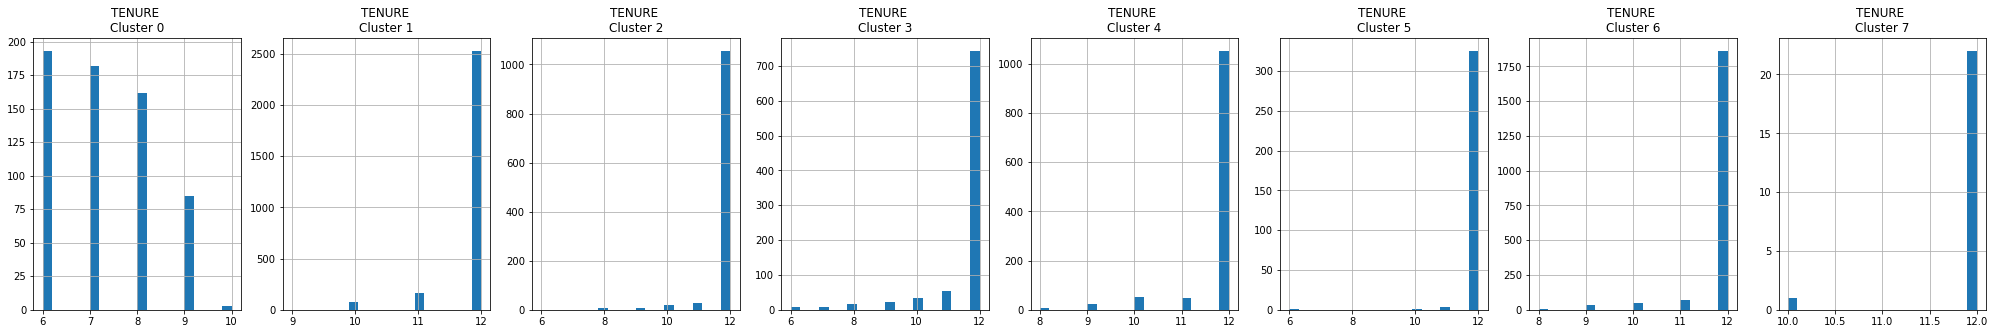

In [21]:
for i in cc_df.columns:
  plt.figure(figsize= (35, 5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = cc_df_cluster[cc_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))

plt.show()

### APPLYING PRINCIPAL COMPONENT ANALYSIS

In [22]:
pca = PCA(n_components= 2)
pca_applied = pca.fit_transform(cc_df_scaled)

In [23]:
pca_df = pd.DataFrame(data = pca_applied, columns= ['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.682221,-1.076450
1,-1.138302,2.506491
2,0.969694,-0.383539
3,-0.873624,0.043161
4,-1.599435,-0.688579


In [24]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis= 1)
pca_df.head()

,PCA1,PCA2,cluster
0,-1.682221,-1.076450,1
1,-1.138302,2.506491,3
2,0.969694,-0.383539,2
3,-0.873624,0.043161,1
4,-1.599435,-0.688579,1


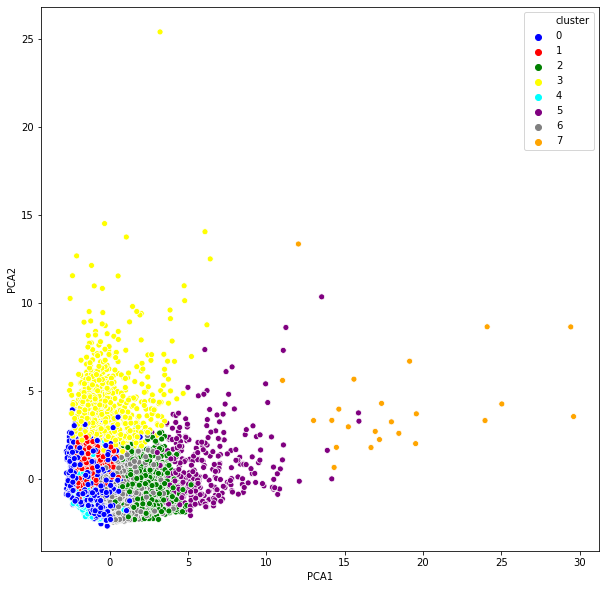

In [25]:
plt.figure(figsize= (10, 10))
ax.set_title('PCA', fontsize = 20)
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df, palette= ['blue', 'red', 'green', 'yellow', 'cyan', 'purple', 'grey', 'orange'])

In [26]:
pca.explained_variance_ratio_

array([0.27290037, 0.20301991])

In [27]:
pca.explained_variance_ratio_.sum()

0.47592028549264953

### USING MEDIAN VS. MEAN

In [28]:
cc_df2 = pd.read_csv('/Users/davidlee/Documents/Work/queens/data/CC GENERAL.csv')

In [29]:
cc_df2.loc[(cc_df2['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = cc_df2['MINIMUM_PAYMENTS'].median()
cc_df2.loc[(cc_df2['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = cc_df2['CREDIT_LIMIT'].median()

In [30]:
cc_df2.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [31]:
cc_df2.drop('CUST_ID', axis= 1, inplace= True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


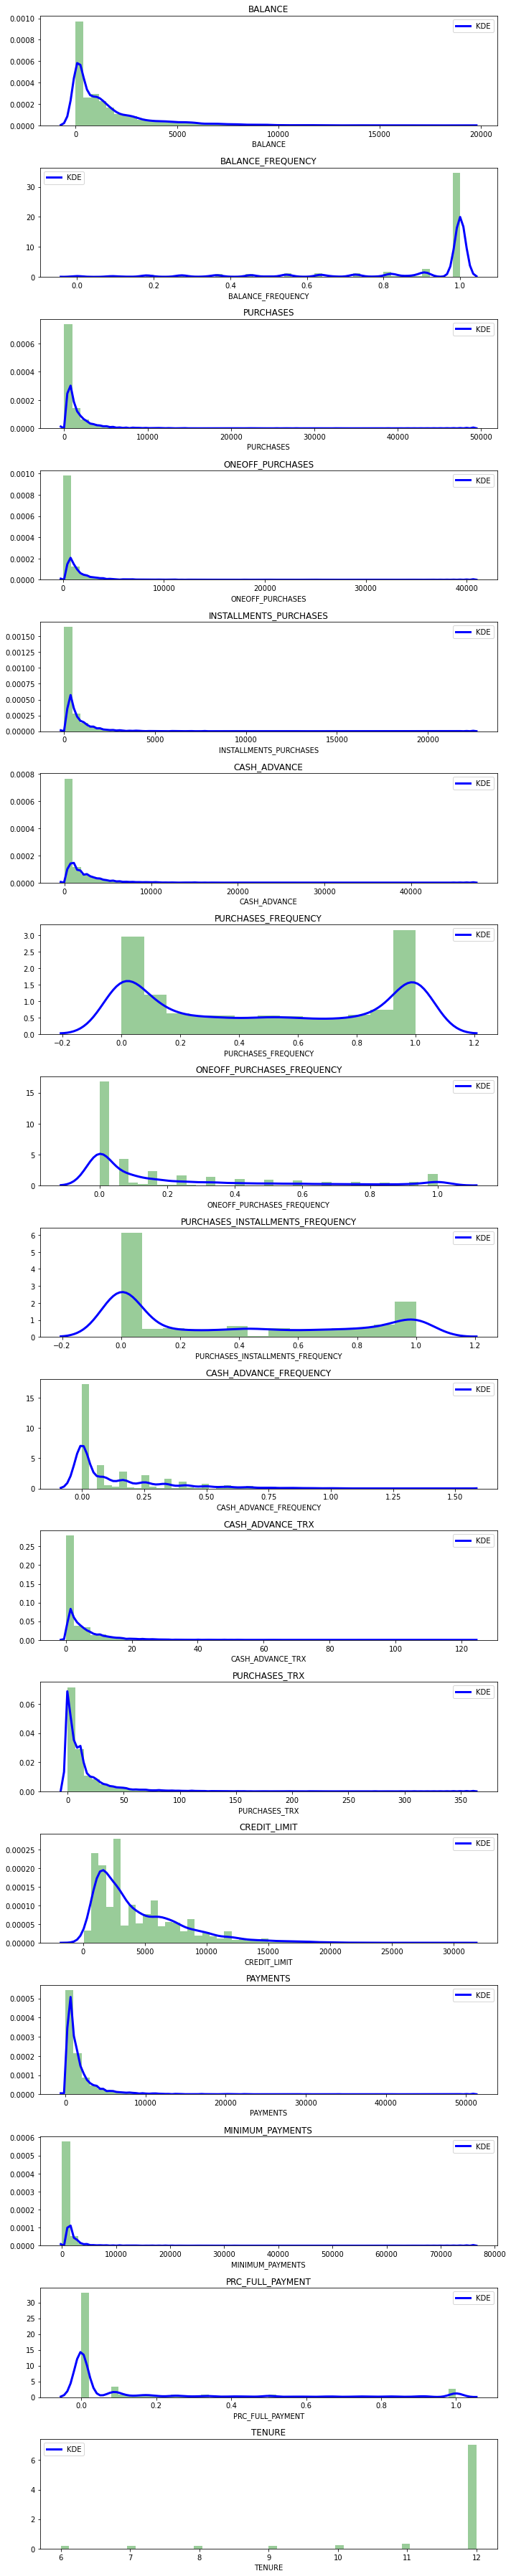

In [32]:
plt.figure(figsize= (10, 50))

for i in range(len(cc_df2.columns)):
  plt.subplot(17, 1 , i+1)
  sns.distplot(cc_df2[cc_df2.columns[i]], kde_kws= {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws= {'color':'g'})
  plt.title(cc_df2.columns[i])

plt.tight_layout()

In [33]:
cc_corr2 = cc_df2.corr()

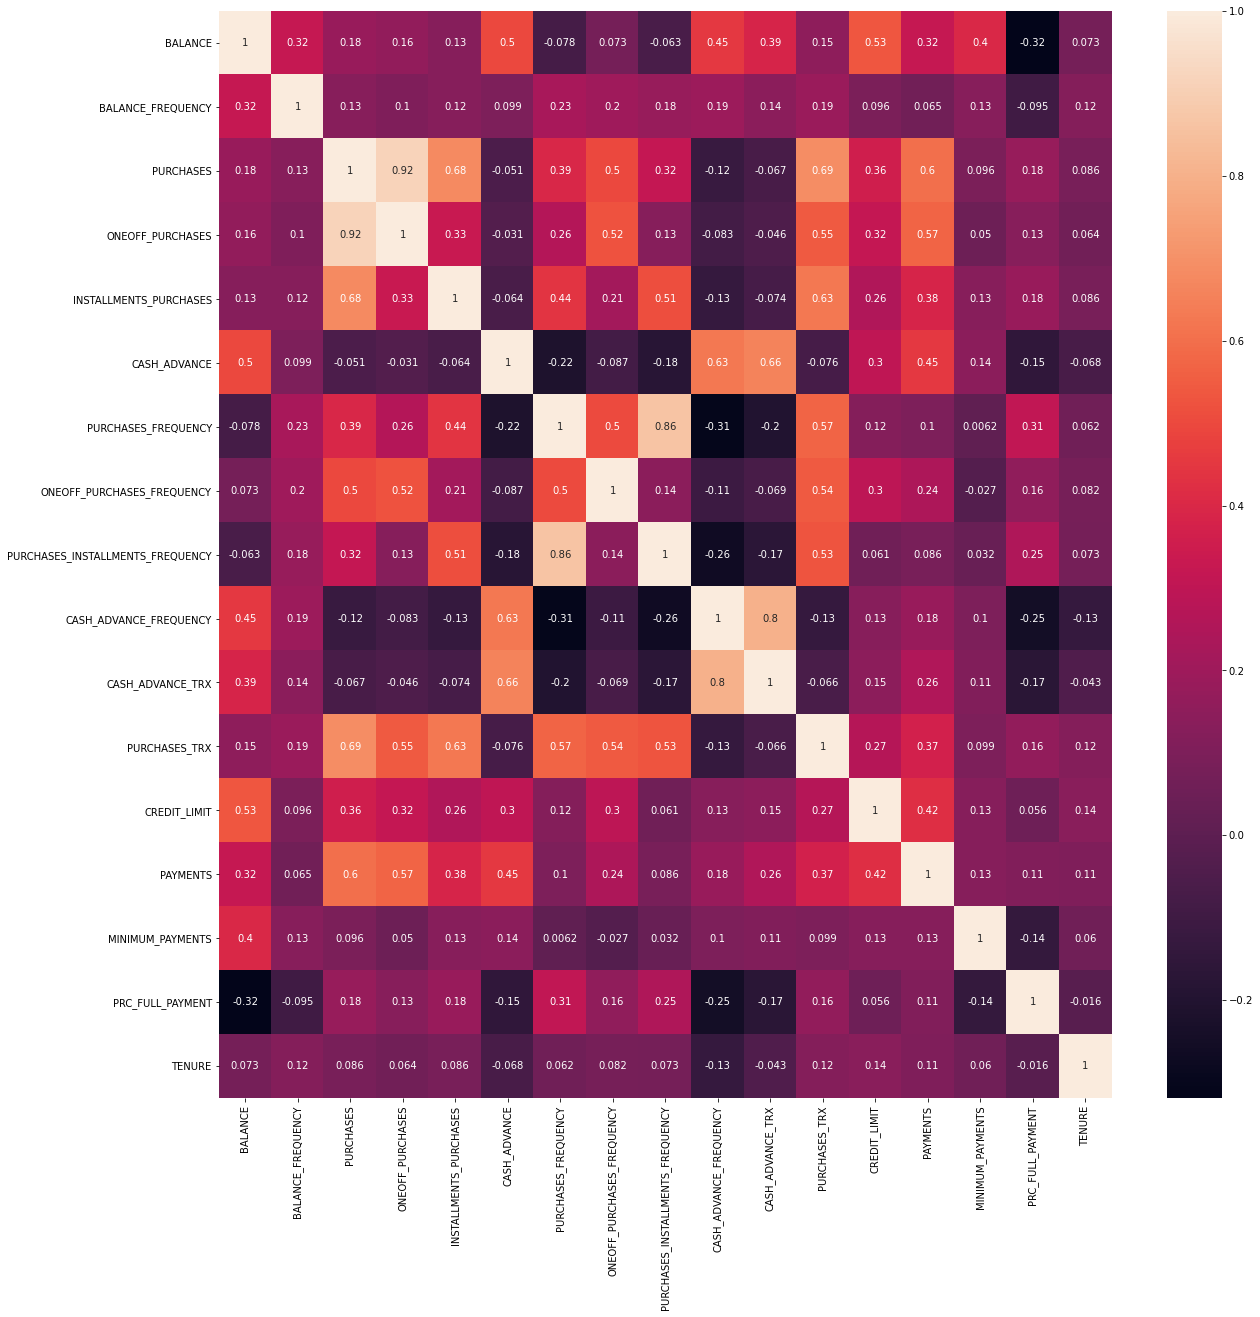

In [34]:
f, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(cc_corr2, annot= True)

In [35]:
cc_df_scaled2 = scaler.fit_transform(cc_df2)

In [36]:
score2 = []

for i in range_values:
  kmeans2 = KMeans(n_clusters= i)
  kmeans2.fit(cc_df_scaled2)
  score2.append(kmeans2.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

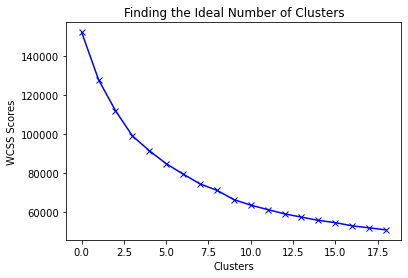

In [37]:
plt.plot(score2, 'bx-')
plt.title('Finding the Ideal Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS Scores')
plt.show

In [38]:
kmeans2 = KMeans(8)
kmeans2.fit(cc_df_scaled2)
labels = kmeans2.labels_
cluster_centers2 = pd.DataFrame(data = kmeans2.cluster_centers_, columns= [cc_df2.columns])

In [39]:
cluster_centers2 = scaler.inverse_transform(cluster_centers2)
cluster_centers2 = pd.DataFrame(data = cluster_centers2, columns= [cc_df2.columns])

In [40]:
cluster_centers2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5074.010044,0.970375,539.143482,334.629072,204.630871,5191.855751,0.301422,0.140419,0.201051,0.518063,16.350515,8.107675,8239.753202,4103.940565,2146.895448,0.039617,11.612829
1,811.530431,0.956020,928.599272,189.879812,739.162116,217.022499,0.888900,0.087972,0.843436,0.040382,0.790387,19.419227,3543.741428,1110.786328,789.444517,0.245394,11.860258
2,3733.806745,0.987426,6346.159662,3590.608789,2757.241014,640.617891,0.957840,0.668720,0.870470,0.078143,2.219718,92.470423,9236.056338,5892.801050,2165.411857,0.227338,11.969014
3,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2440.642055,596.072587,341.089329,0.157880,7.231140
4,1590.055705,0.972965,240.206388,191.184026,49.202187,781.626840,0.147918,0.084669,0.064497,0.155849,3.057049,2.735465,3391.048934,1011.267652,826.236392,0.020529,11.882994
5,104.879787,0.369878,339.774078,202.337758,137.687420,303.307732,0.267475,0.070399,0.189510,0.030866,0.681049,4.282572,3856.463151,1148.051951,180.878855,0.236172,11.783418
6,1283.228811,0.972033,2156.847729,1704.708833,452.138896,283.486514,0.882964,0.770311,0.431685,0.052328,0.994657,30.040962,6058.261151,2149.431652,487.404698,0.284035,11.877115
7,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667


In [41]:
cc_df_cluster2 = pd.concat([cc_df2, pd.DataFrame({'cluster':labels})], axis = 1)

cc_df_cluster2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


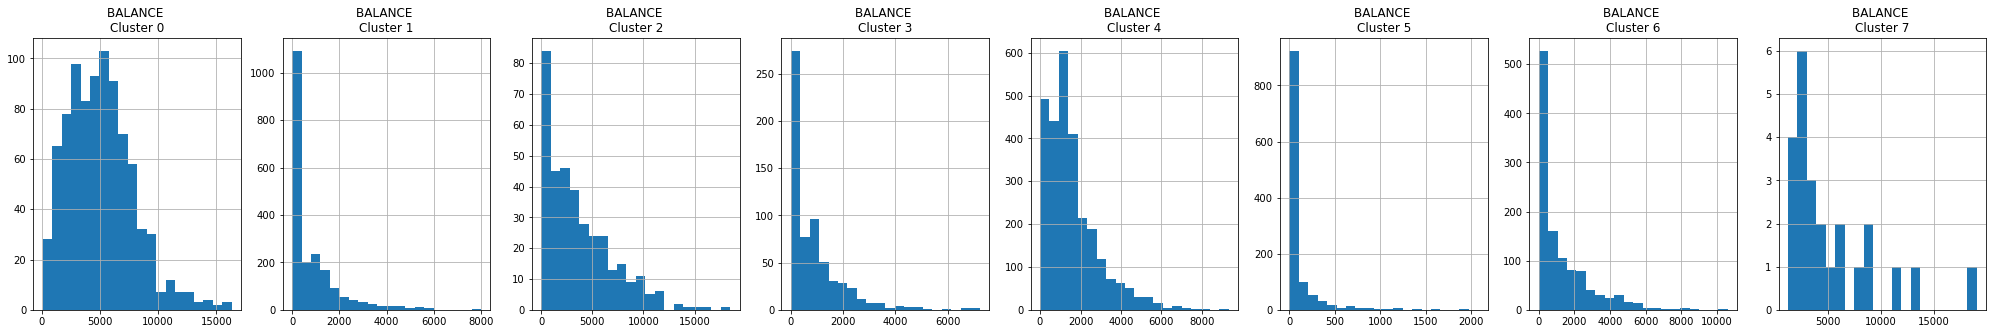

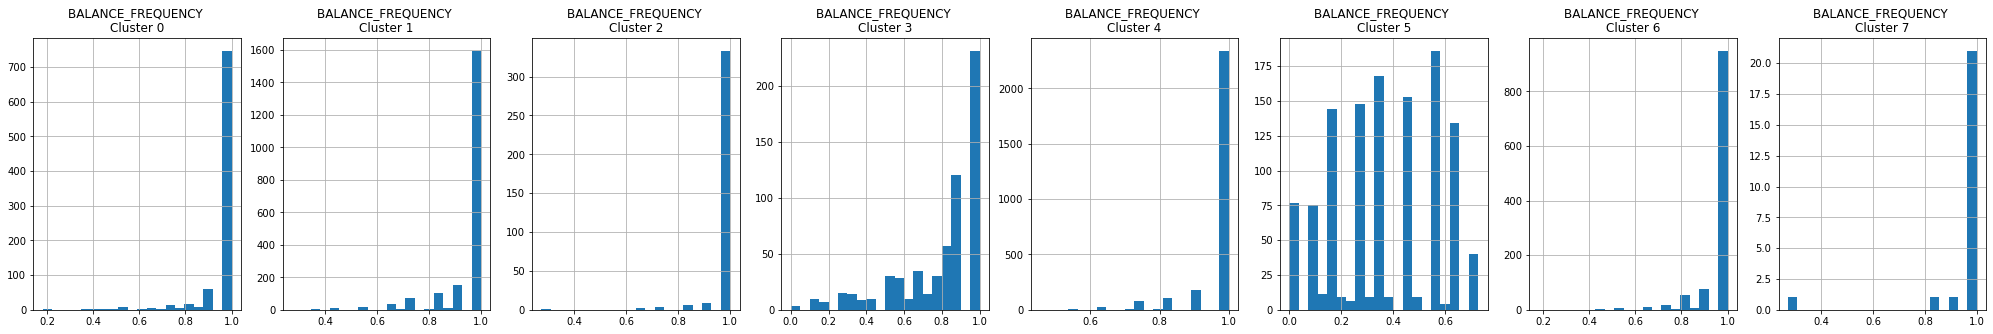

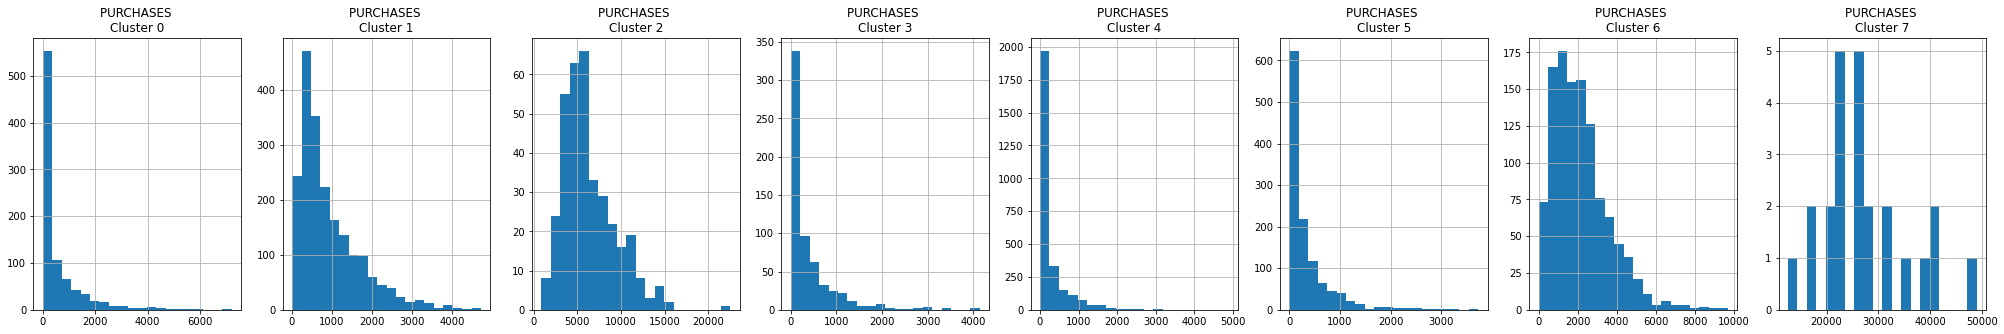

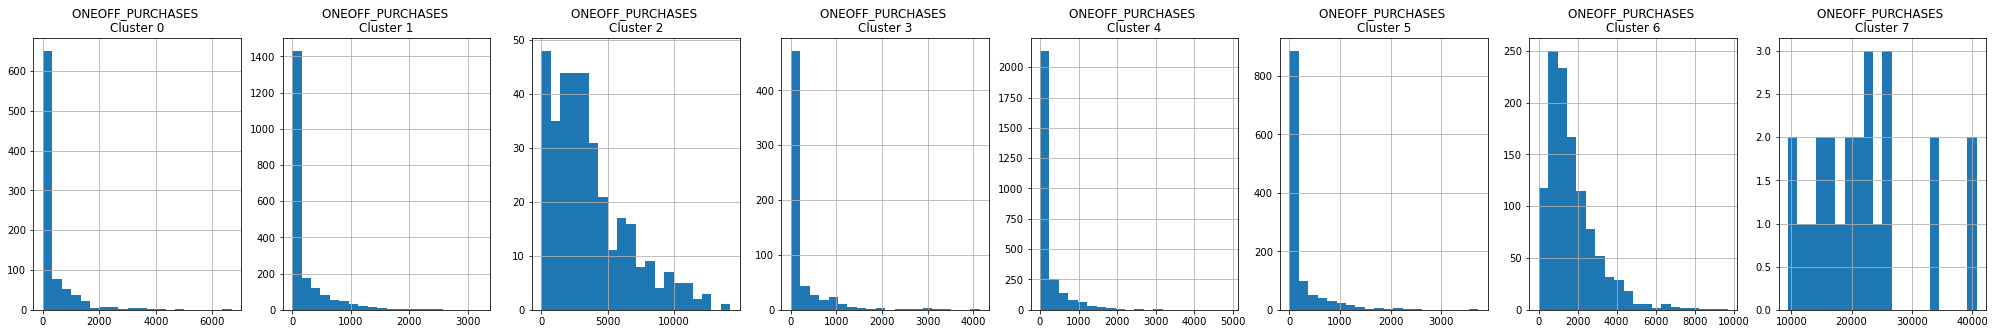

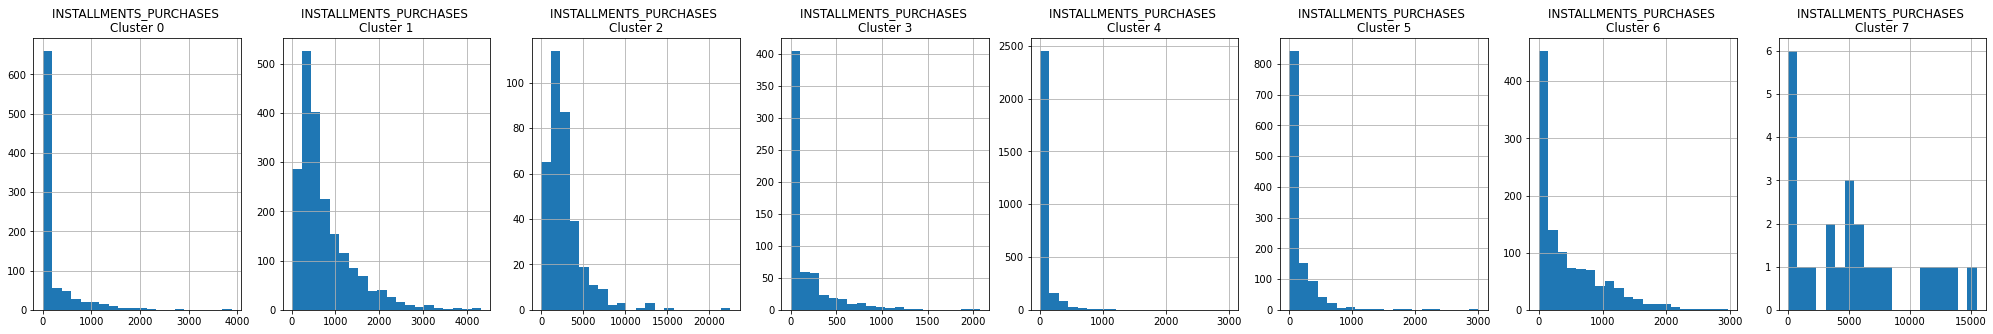

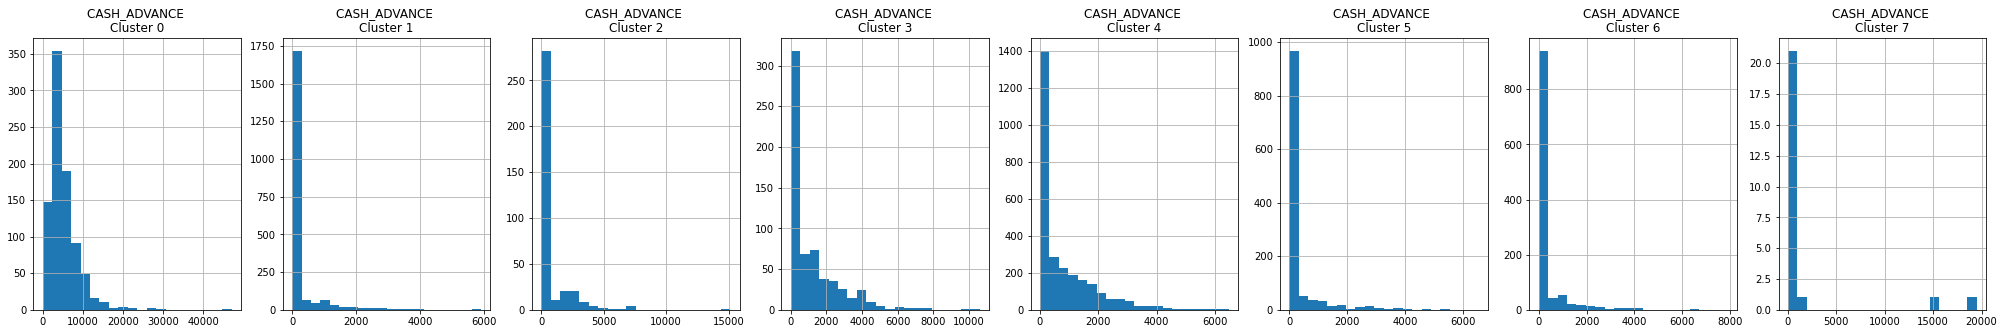

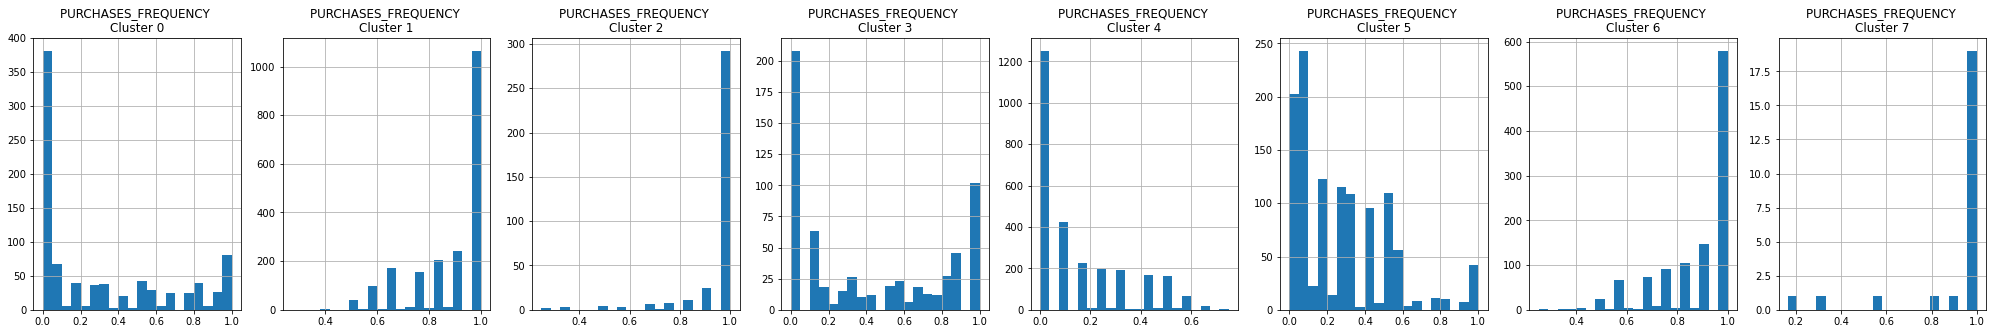

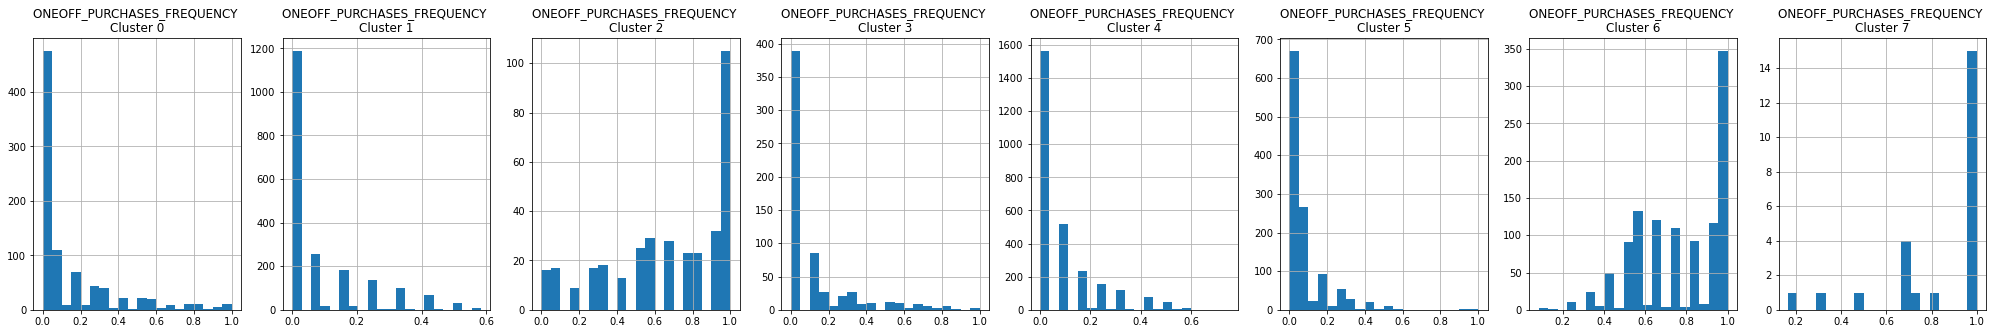

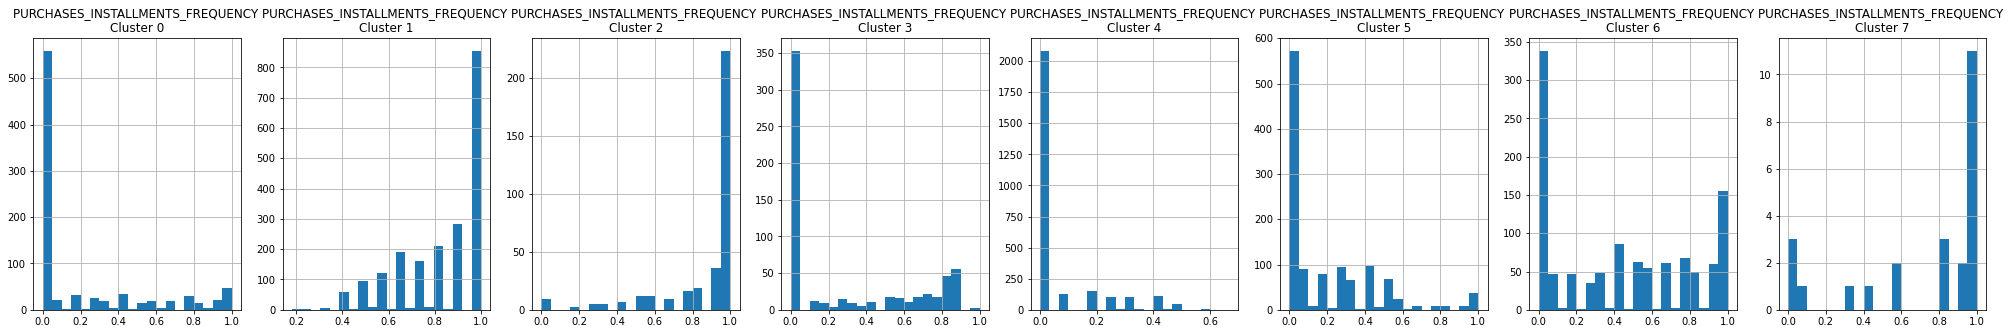

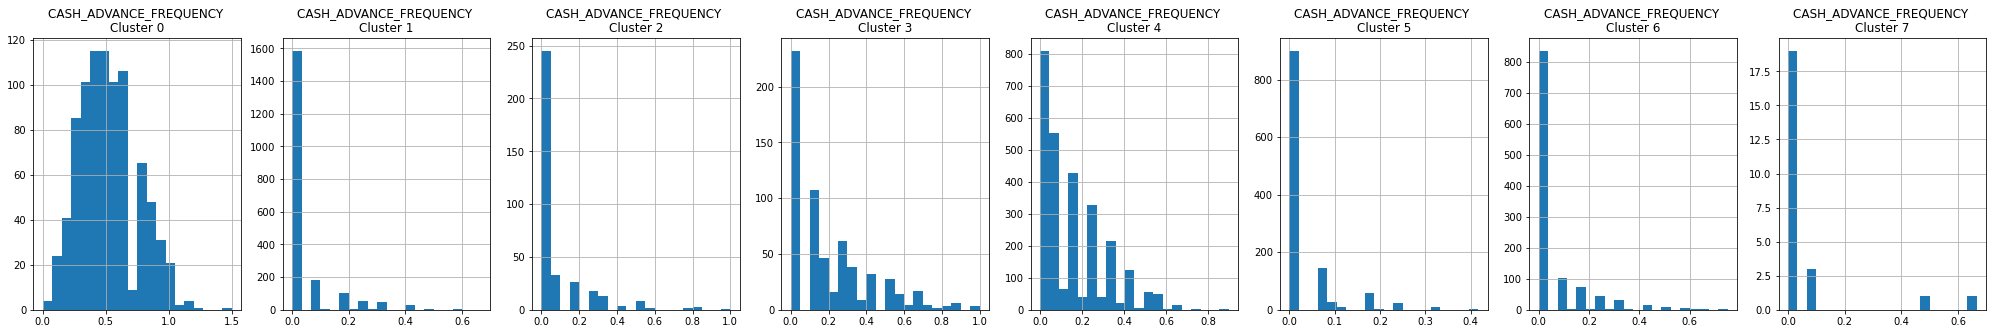

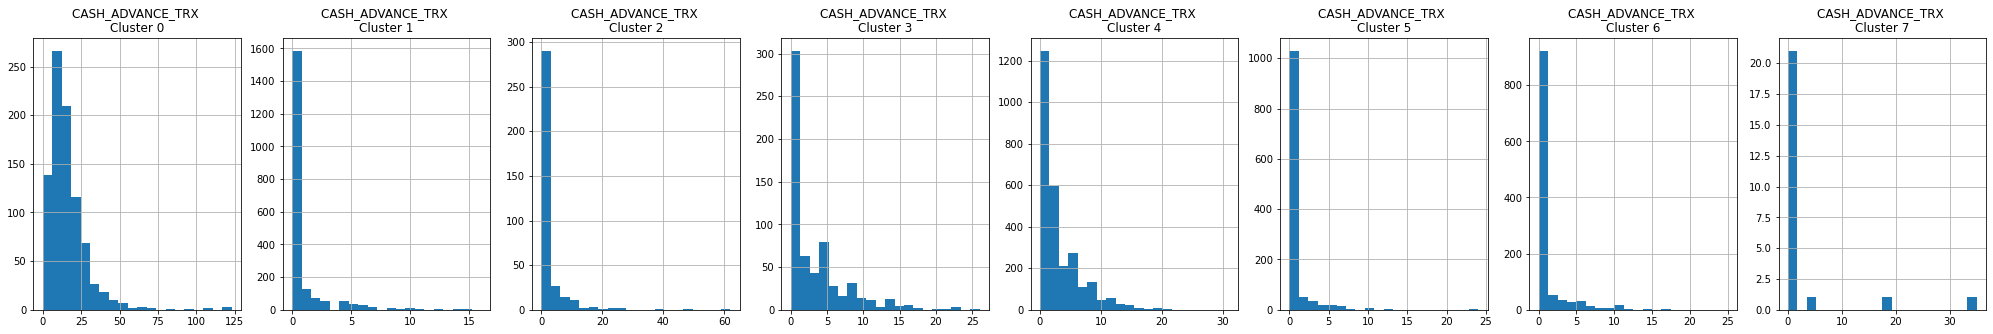

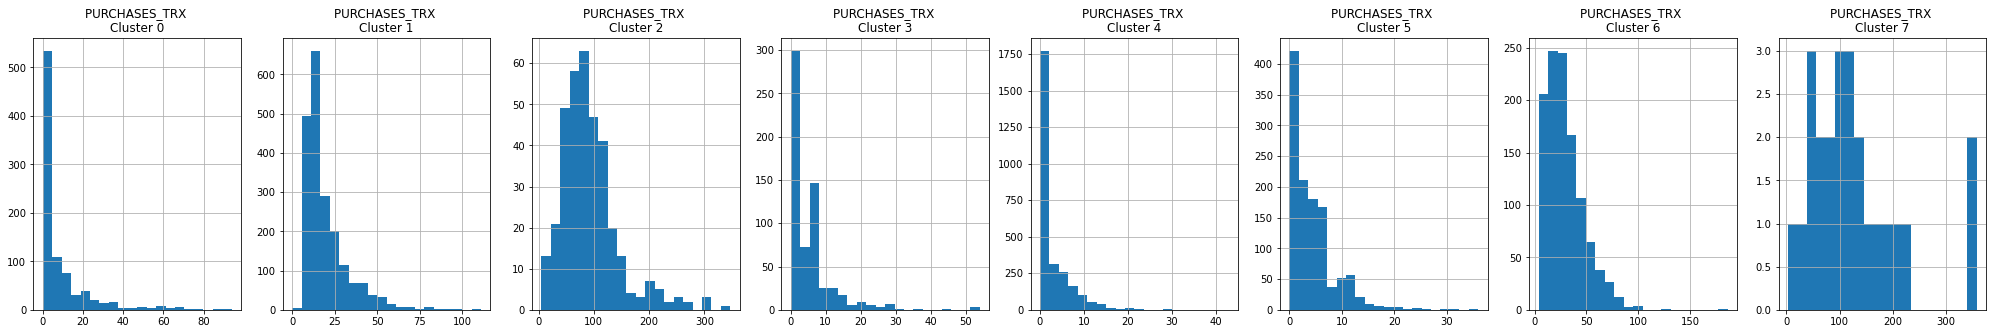

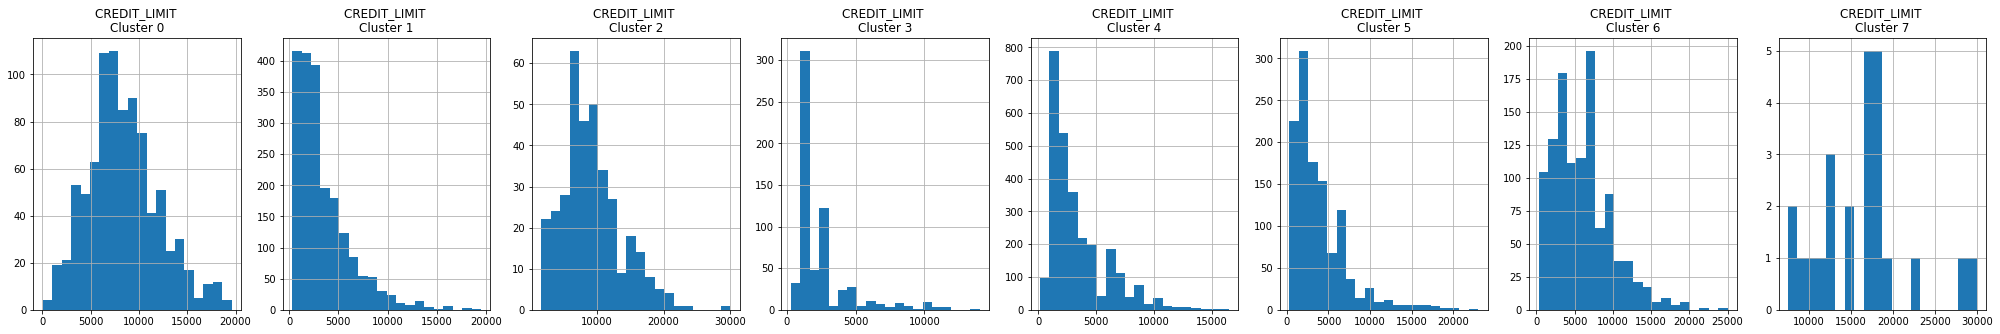

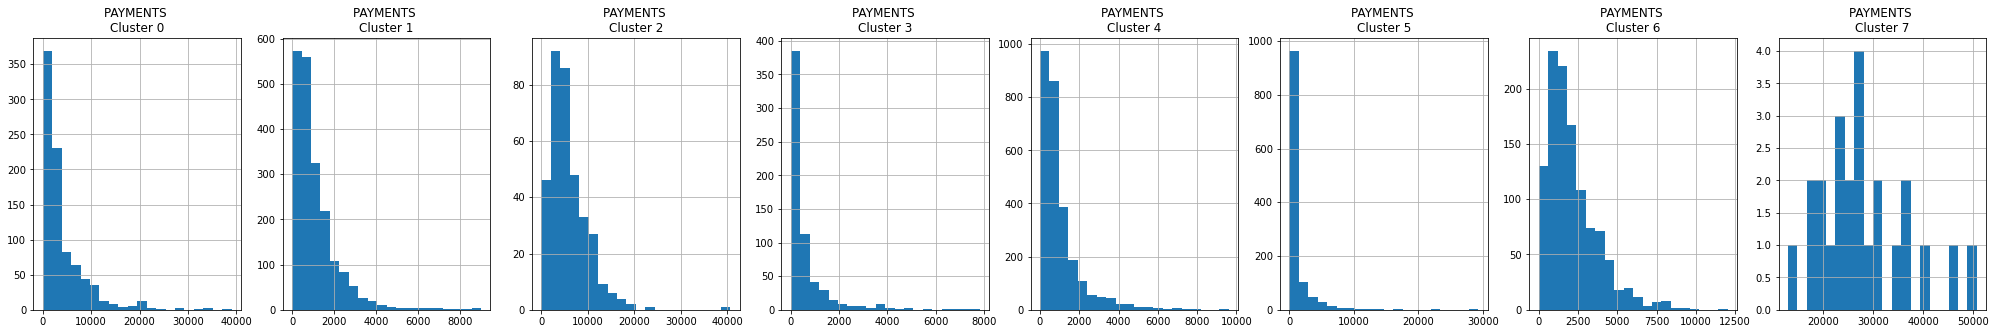

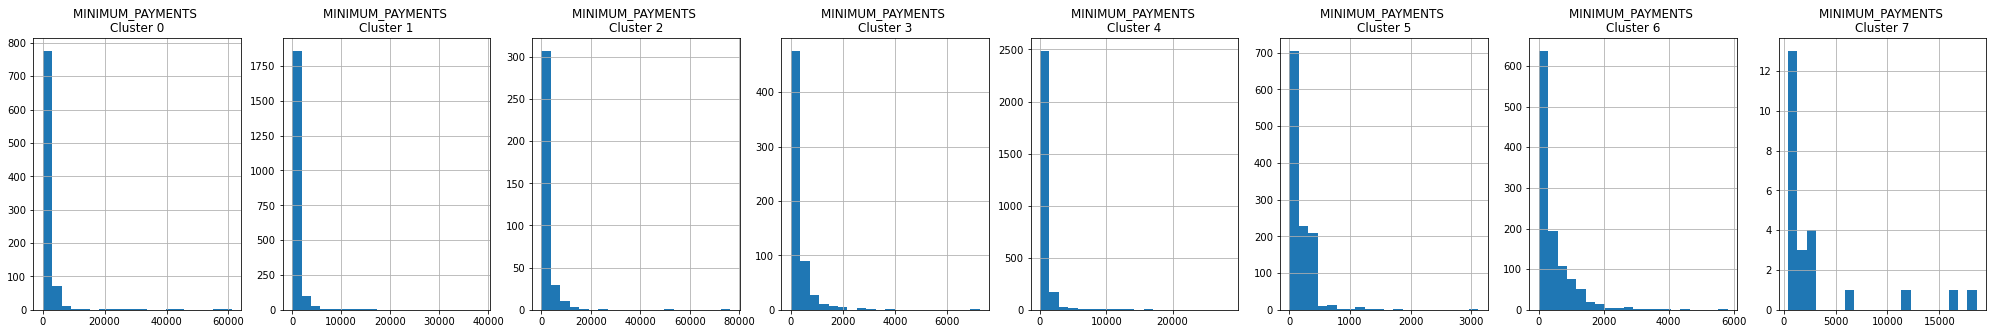

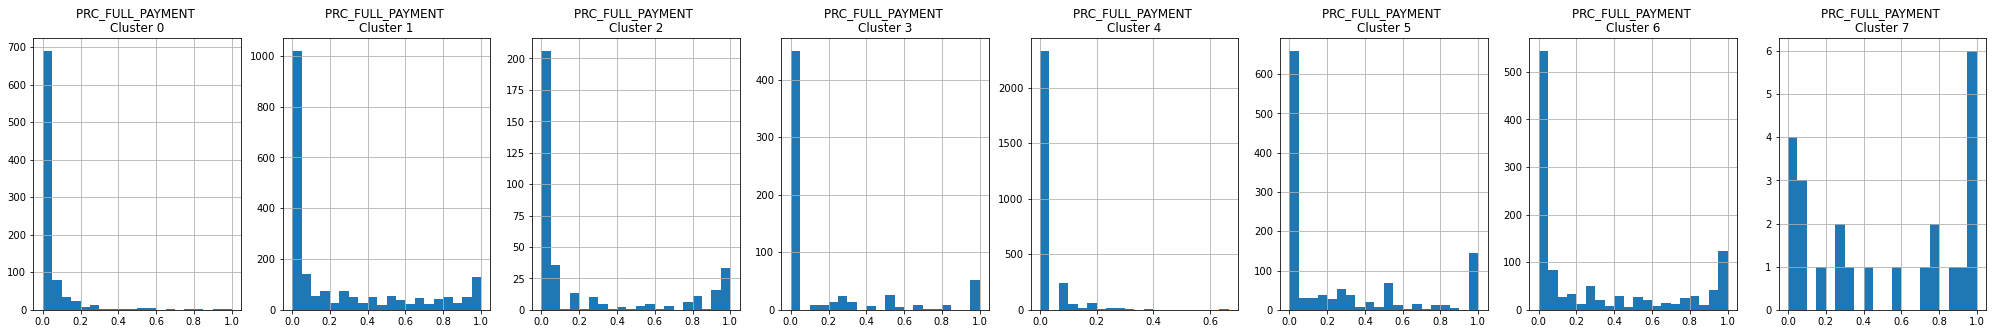

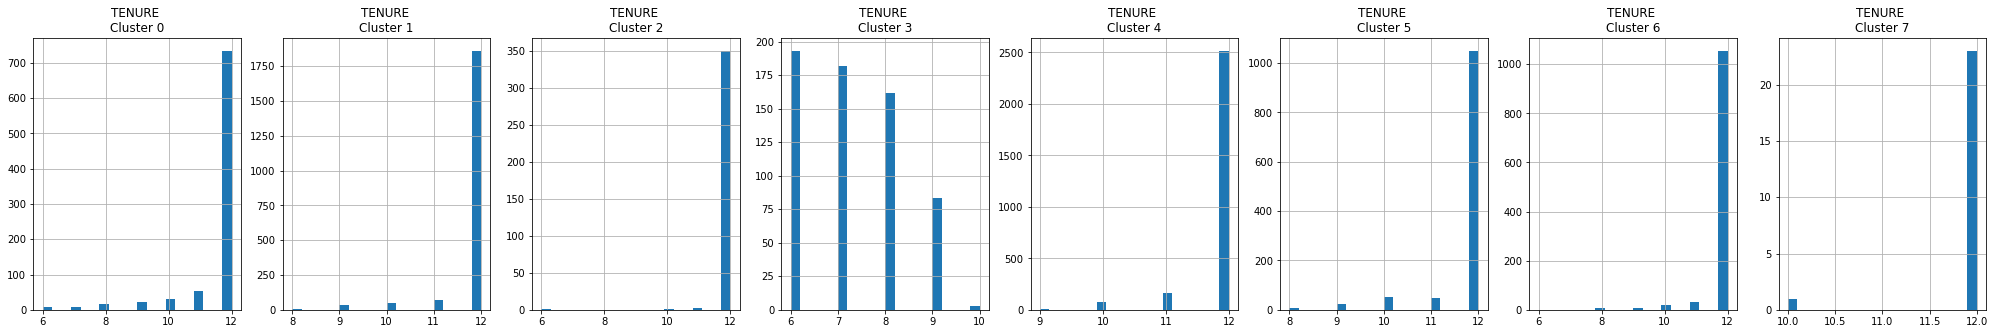

In [42]:
for i in cc_df2.columns:
  plt.figure(figsize= (35, 5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = cc_df_cluster2[cc_df_cluster2['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))

plt.show()

In [43]:
pca_applied2 = pca.fit_transform(cc_df_scaled2)

In [44]:
pca_df2 = pd.DataFrame(data = pca_applied2, columns= ['PCA1', 'PCA2'])
pca_df2.head()

,PCA1,PCA2
0,-1.683650,-1.072238
1,-1.134090,2.509157
2,0.969396,-0.383577
3,-0.888224,0.004655
4,-1.600020,-0.683794


In [45]:
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster':labels})], axis= 1)
pca_df2.head()

,PCA1,PCA2,cluster
0,-1.683650,-1.072238,4
1,-1.134090,2.509157,0
2,0.969396,-0.383577,6
3,-0.888224,0.004655,4
4,-1.600020,-0.683794,4


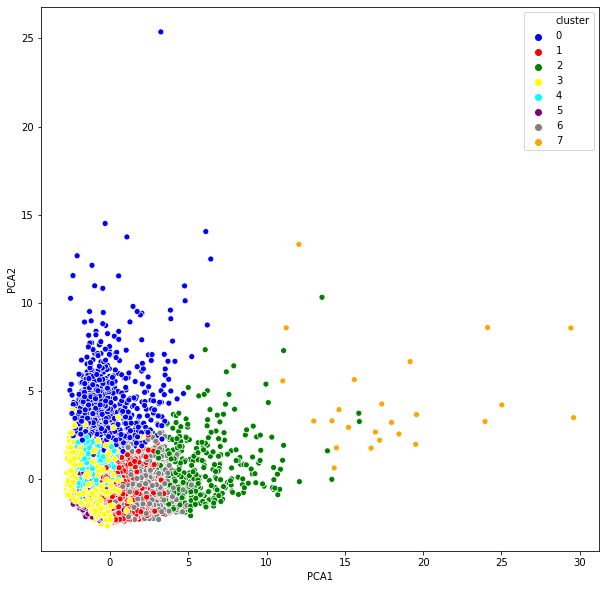

In [46]:
plt.figure(figsize= (10, 10))
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df2, palette= ['blue', 'red', 'green', 'yellow', 'cyan', 'purple', 'grey', 'orange'])

In [47]:
pca.explained_variance_ratio_

array([0.27297671, 0.2031378 ])

In [48]:
pca.explained_variance_ratio_.sum()

0.4761145096092789